<a href="https://colab.research.google.com/github/BhanuPShahi/Airbnb-Bookings-Analysis/blob/main/Bhanu_Pratap_Shahi_24_02_2021_%5BABTN0101%5D_AirBnB_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##[ABTN0101] AirBnB Bookings Analysis

Introduction -

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

Dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as : 

1.What can we learn about different hosts and areas?

2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

3.Which hosts are the busiest and why?

4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#loading the data file and creating a dataframe
path='/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Week 4/Day 3/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(path)

In [79]:
airbnb_df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


**What are neighbourhoods?**

### *Neighborhoods* are a way to help travelers make informed decisions about where to stay when planning a trip. When visiting a new city, it can be helpful to know which neighborhoods may fit your interests and the purpose of your trip.

##1.What can we learn about different hosts and areas?

In [11]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [57]:
area_df = airbnb_df[['neighbourhood']]
area_df['number_of_bookings']=airbnb_df['id']
grouped_area_df=area_df.groupby('neighbourhood').count().reset_index()
grouped_area_df.sort_values('number_of_bookings',ascending=False,inplace=True,ignore_index=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
grouped_area_df.head(5)

,neighbourhood,number_of_bookings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


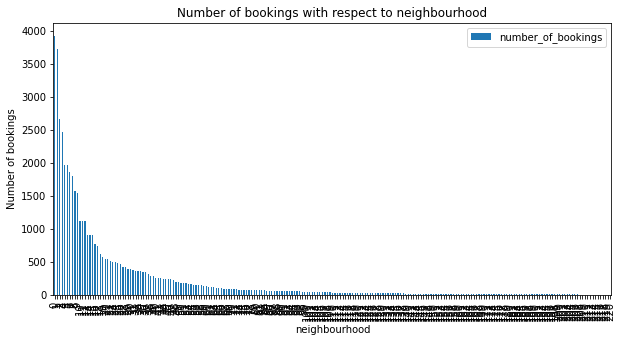

In [59]:
# Create the plot object
grouped_area_df.plot(kind='bar')

plt.title('Number of bookings with respect to neighbourhood')
plt.ylabel('Number of bookings')
plt.xlabel('neighbourhood')

# Set the display figure size using rcParams method 
plt.rcParams['figure.figsize'] = (40, 10)

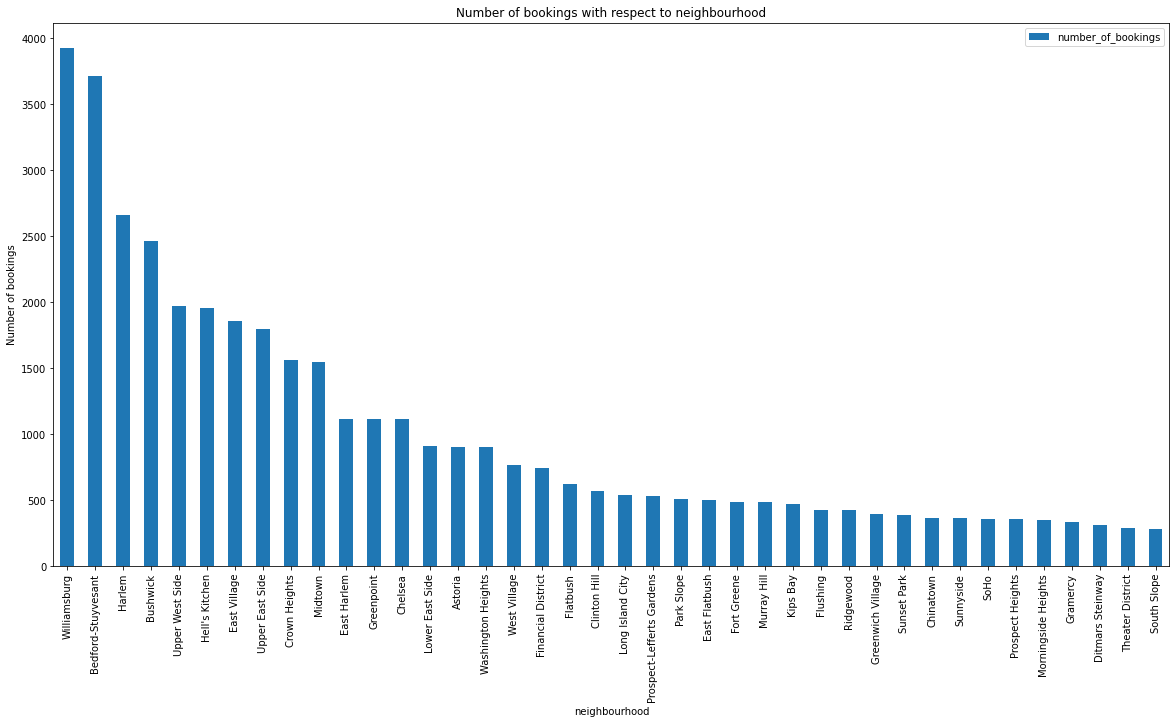

In [67]:
#plotting the top 40 preferred area
top_40_preferred_area_df=grouped_area_df[0:40]
top_40_preferred_area_df.plot(x = "neighbourhood", y = "number_of_bookings", kind = "bar")
plt.title('Number of bookings with respect to neighbourhood')
plt.ylabel('Number of bookings')
plt.xlabel('neighbourhood')
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

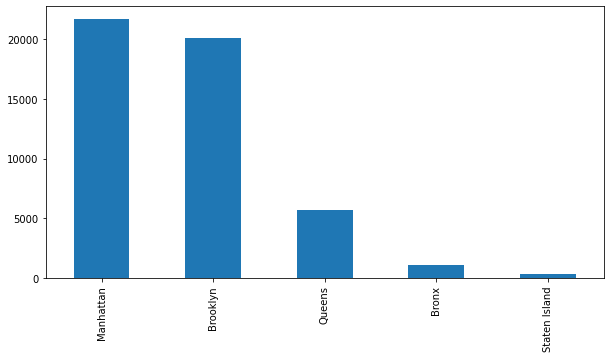

In [77]:
# airbnb_df['neighbourhood_group'].value_count().plot(kind='bar')
airbnb_df['neighbourhood_group'].value_counts().plot(kind='bar')

# plt.rcParams['figure.figsize'] = (10, 5)


In [ ]:
ANALYSIS

# Area Analysis

*   Manhattan neighbourhood_group is most in demand followed by Brooklyn.





In [ ]:
host_df=airbnb_df.groupby('host_name').count().reset_index()
host_df.sort_values('id',ascending=False,inplace=True,ignore_index=True)
host_df.shape


(11452, 16)